### Word Embeddings

<br>

#### Activity 3b: Text Classification using RNNs and AG_NEWS dataset in PyTorch
<br>

- Objective:
    - Understand the basics of Recurrent Neural Networks (RNNs) and their application in text classification.
    - Learn how to handle a real-world text dataset, AG_NEWS, in PyTorch.
    - Gain hands-on experience in defining, training, and evaluating a text classification model in PyTorch.
    
<br>

- Instructions:
    - Data Preparation: Starter code will be provided that loads the AG_NEWS dataset and prepares it for training. Do not modify this part. However, you should be sure to understand it, and comment it, the use of markdown cells is suggested.

    - Model Setup: A skeleton code for the RNN model class will be provided. Complete this class and use it to instantiate your model.

    - Implementing Accuracy Function: Write a function that takes model predictions and ground truth labels as input and returns the model's accuracy.

    - Training Function: Implement a function that performs training on the given model using the AG_NEWS dataset. Your model should achieve an accuracy of at least 80% to get full marks for this part.

    - Text Sampling: Write a function that takes a sample text as input and classifies it using your trained model.

    - Confusion Matrix: Implement a function to display the confusion matrix for your model on the test data.

    - Submission: Submit your completed Jupyter Notebook. Make sure to include a markdown cell at the beginning of the notebook that lists the names of all team members. Teams should consist of 3 to 4 members.
    
<br>

- Evaluation Criteria:

    - Correct setup of all the required libraries and modules (10%)
    - Code Quality (30%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity. Comments should be given for all the provided code, this will help you understand its functionality.
    
   - Functionality (60%):
        - All the functions should execute without errors and provide the expected outputs.
        - RNN model class (20%)
        - Accuracy fucntion (10%)
        - Training function (10%)
        - Sampling function (10%)
        - Confucion matrix (10%)

        - The model should achieve at least an 80% accuracy on the AG_NEWS test set for full marks in this criterion.


Dataset

https://pytorch.org/text/stable/datasets.html#text-classification

https://paperswithcode.com/dataset/ag-news


#### Install libraries (if needed)

You may need to install the following libraries to ensure version compatibility. After installing them, please Restart the Session (Runtime -> Restart Session)

In [ ]:
!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 torchtext==0.15.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 4.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 31.7 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 15.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 115.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 8.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 115.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 84.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 109.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 5.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 15.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 41.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install scipy==1.9.3
!pip install scikit-plot
#you may receive a message of restarting session, this is OK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 958.2 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.4/33.4 MB 56.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 82.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.3
    Uninstalling numpy-1.26.3:
      Successfully uninstalled numpy-1.26.3
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.2
    Uninstalling scipy-1.11.2:
      Successfully uninstalled scipy-1.11.2


In [ ]:
!pip install portalocker
#please restar session after this intallation. After restarting go straight to importing the libraries

## Import libraries

In [ ]:
# The following libraries are required for running the given code
# Please feel free to add any libraries you consider adecuate to complete the assingment.
import numpy as np
#PyTorch libraries
import torch
from torch import optim
from torchtext.datasets import AG_NEWS
# Dataloader library
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split

# Libraries to prepare the data
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.functional import to_map_style_dataset
# neural layers
from torch import nn
from torch.nn import functional as F

# These libraries are suggested to plot confusion matrix
# you may use others
import scikitplot as skplt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import gc
from tqdm import tqdm

import itertools
import matplotlib.pyplot as plt
import pandas as pd
import random


Checking if CUDA is available in the system.

In [ ]:
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


Check information about the GPU

In [ ]:
if torch.cuda.is_available():
    print("GPU: ", torch.cuda.get_device_name(0))
    print("GPU: ", torch.cuda.get_device_properties(0))

GPU:  NVIDIA RTX A4000
GPU:  _CudaDeviceProperties(name='NVIDIA RTX A4000', major=8, minor=6, total_memory=16108MB, multi_processor_count=48)


### Get the train and the test datasets and dataloaders

Classes:

* 1 - World

* 2 - Sports

* 3 - Business

* 4 - Sci/Tech

We will convert them to:

* 0 - World

* 1 - Sports

* 2 - Business

* 3 - Sci/Tech

In [ ]:
train_dataset, test_dataset = AG_NEWS()
train_dataset, test_dataset = to_map_style_dataset(train_dataset), to_map_style_dataset(test_dataset)

In [ ]:
# Get the tokeniser
# tokeniser object
tokeniser = get_tokenizer('basic_english')

def yield_tokens(data):
    for _, text in data:
        yield tokeniser(text)

In [ ]:
# Build the vocabulary
vocab = build_vocab_from_iterator(yield_tokens(train_dataset), specials=["<unk>"])
#set unknown token at position 0
vocab.set_default_index(vocab["<unk>"])

In [ ]:
#test tokens
tokens = tokeniser('Welcome to TC5033')
print(tokens, vocab(tokens))

['welcome', 'to', 'tc5033'] [3314, 4, 0]


In [ ]:
NUM_TRAIN = int(len(train_dataset)*0.9)
NUM_VAL = len(train_dataset) - NUM_TRAIN

In [ ]:
# set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)


In [ ]:
train_dataset, val_dataset = random_split(train_dataset, [NUM_TRAIN, NUM_VAL])

We can review the datasets sizes. This way we can see how many samples we have for training, validation and testing.

In [ ]:
print(f"Number of training examples: {len(train_dataset)}")
print(f"Number of validation examples: {len(val_dataset)}")
print(f"Number of testing examples: {len(test_dataset)}")

Number of training examples: 108000
Number of validation examples: 12000
Number of testing examples: 7600


In [ ]:
# function passed to the DataLoader to process a batch of data as indicated
def collate_batch(batch):
    # Get label and text
    y, x = list(zip(*batch))

    # Create list with indices from tokeniser
    x = [vocab(tokeniser(text)) for text in x]
    x = [t + ([0]*(max_tokens - len(t))) if len(t) < max_tokens else t[:max_tokens] for t in x]

    # Prepare the labels, by subtracting 1 to get them in the range 0-3
    return torch.tensor(x, dtype=torch.int32), torch.tensor(y, dtype=torch.int32) - 1

Starting values to define the target classes, the max number of tokens and the batch size.

In [ ]:
labels =  ["World", "Sports", "Business", "Sci/Tech"]
max_tokens = 50
BATCH_SIZE = 256

Once the batch size and the training, validation and testing datasets are defined, we can create the data loaders.

The parameter shuffle=True is used to shuffle the data at every epoch, this practice is recommended to avoid overfitting.

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)

### Let us build our RNN model

Starting with some definitions:

- The embedding size, this is set to 300.
- The number of neurons in the hidden layer, this is set to 256 as default value for the practice.
- The number of layers, this is set to 2.
- The expected output size or number of classes, this is set to 4.

In [ ]:
EMBEDDING_SIZE = 300
NEURONS = 256
LAYERS = 2
NUM_CLASSES = 4

#### Accuracy function

To define the accuracy function, we decided to re-use the code provided in previous practices. The method is maintained simple, and it is only returning the average accuracy of the epoch.

In [ ]:
def accuracy(model, loader):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient computation
        for x, y in loader:
            x, y = x.to(device), y.to(device)  # Ensure data is on the correct device
            outputs = model(x)
            _, predicted = torch.max(outputs, 1)  # Get the predicted class for each sample
            total += y.size(0)  # Total number of samples
            correct += (predicted == y).sum().item()  # Count correct predictions

    model.train()  # Set the model back to training mode
    return correct / total  # Return accuracy as a proportion

#### Training function

For the train function, in this case, we are using code from other practices as well, but with some significant changes. The main difference is that we are using an early stopping mechanism to avoid overfitting and extra training. The early stopping is based on the validation accuracy, if the validation accuracy does not improve in a certain number of epochs, 2 by default, the training stops. This is a good practice to reduce the training time and save computational resources.

The function is thinking to show status messages to the user, so the user can see the progress of the training.

The function returns the loss and accuracy history for the training and validation datasets. This information can be used to plot the training and validation loss and accuracy.

In [ ]:
def train(model, optimiser, epochs=100, patience=2, min_delta=0.01):
    criterion = nn.CrossEntropyLoss()  # Loss function for classification
    best_val_accuracy = 0.0  # Track the best validation accuracy
    patience_counter = 0  # Count epochs without significant improvement
    accuracy_history = []  # Track accuracy history
    loss_history = []  # Track loss history

    for epoch in range(epochs):
        # Set model to training mode
        model.train()

        running_loss = 0.0
        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            # Convert input and labels to the correct device
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Ensure labels are of correct type
            labels = labels.to(torch.long)

            optimiser.zero_grad()  # Reset gradients for each batch

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimiser.step()

            running_loss += loss.item()  # Accumulate loss for this epoch

        # Print average loss for this epoch
        avg_loss = running_loss / len(train_loader)
        loss_history.append(avg_loss)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

        # Validation phase
        val_acc = accuracy(model, val_loader)
        accuracy_history.append(val_acc)
        print(f"Validation Accuracy: {val_acc:.2f}%")

        # Check if validation accuracy improved by more than `min_delta`
        if val_acc > best_val_accuracy + min_delta:
            best_val_accuracy = val_acc  # Update best accuracy
            patience_counter = 0  # Reset patience counter
            print(f"Improved validation accuracy to {val_acc:.2f}%")
        else:
            patience_counter += 1  # Increment patience counter
            print(f"No significant improvement. Patience counter: {patience_counter}/{patience}")

        # Early stopping if patience is exceeded
        if patience_counter >= patience:
            print("Early stopping due to no significant improvement in validation accuracy.")
            break

    print("Training complete.")

    return accuracy_history, loss_history

#### Plotting the training and validation loss and accuracy

We define a function to plot the training and validation loss and accuracy. This function receives the loss and accuracy history for the training and validation returned by the training function. This function is used to plot all the trainign results in the notebook.

In [ ]:
def plot_train_loss_and_accuracy(title, accuracy_history, loss_history):
    # Plotting the training loss and accuracy through epochs
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    epochs = len(accuracy_history)
    fig.suptitle(title)

    for i, (history, title) in enumerate(zip([accuracy_history, loss_history], ["Accuracy", "Loss"])):
        ax[i].plot(range(1, epochs+1), history)
        ax[i].set_title(f"Training {title}")
        ax[i].set_xlabel("Epoch")
        ax[i].set_ylabel(title)
        ax[i].grid(True)

    plt.show()

### Addeding a Grid Search to find the best hyperparameters

As part of the practice, we are going to implement a grid search to find the best hyperparameters for the model. This is a good practice to find the best hyperparameters for the model, specially when the model is complex and has many hyperparameters.

The hyperparameters to be tested are the learning rate, the number of neurons in the hidden layer, and the number of layers.

This function will run a defined number of epochs, 10 by default, comparing the results of the different hyperparameters combinations. The function will return the best hyperparameters combination and the best accuracy found.

In [ ]:
def grid_search_with_plot(model_class, train_loader, val_loader, embed_size, num_classes, learning_rates, hidden_sizes, num_layers_options, epochs=10):
    """
    Performs grid search for hyperparameter tuning and returns results.

    Parameters:
    - model_class: Class of the model (Simple_RNN_Model, GRU_Model, or LSTM_Model).
    - train_loader: DataLoader for training data.
    - val_loader: DataLoader for validation data.
    - embed_size: Size of the embedding layer.
    - num_classes: Number of output classes.
    - learning_rates: List of learning rates to test.
    - hidden_sizes: List of hidden layer sizes to test.
    - num_layers_options: List of layer numbers to test.
    - epochs: Number of epochs to train for each configuration.

    Returns:
    - best_params: Dictionary of the best hyperparameters.
    - best_acc: Best validation accuracy achieved.
    - results_df: DataFrame containing the loss and accuracy for each epoch and hyperparameter combination.
    """
    results = []
    best_acc = 0
    best_params = {}

    print(f"Grid search for {model_class.__name__} started.")

    # Grid search over all combinations
    for lr, hidden, layers in itertools.product(learning_rates, hidden_sizes, num_layers_options):
        title = f"Case: LR={lr}, Neurons={hidden}, Layers={layers}"
        print(f"Validating {title}")

        # Set seed for reproducibility
        torch.manual_seed(42)
        np.random.seed(42)

        # Initialize the model with current hyperparameters
        model = model_class(embed_size=embed_size, hidden=hidden, layers=layers, num_classes=num_classes).to(device)

        # Define optimizer
        optimizer = optim.Adam(model.parameters(), lr=lr)

        # Track loss and accuracy for each epoch
        epoch_losses = []
        epoch_accuracies = []

        # Training loop for fixed number of epochs
        for epoch in tqdm(range(epochs), desc="Epochs"):
            model.train()
            running_loss = 0.0

            for x, y in train_loader:
                x, y = x.to(device), y.to(device).long()
                optimizer.zero_grad()
                outputs = model(x)
                loss = F.cross_entropy(outputs, y)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()

            avg_loss = running_loss / len(train_loader)
            val_acc = accuracy(model, val_loader)

            epoch_losses.append(avg_loss)
            epoch_accuracies.append(val_acc)

        # Append results for the current combination
        for epoch, (loss, acc) in enumerate(zip(epoch_losses, epoch_accuracies)):
            results.append({
                "Model": model_class.__name__,
                "Learning Rate": lr,
                "Hidden Size": hidden,
                "Layers": layers,
                "Epoch": epoch + 1,
                "Loss": loss,
                "Accuracy": acc,
                "Title": title
            })

        # Update best configuration if this is the highest accuracy seen
        if val_acc > best_acc:
            best_acc = val_acc
            best_params = {'learning_rate': lr, 'hidden_size': hidden, 'layers': layers}

    # Convert results to a DataFrame for later plotting
    results_df = pd.DataFrame(results)

    print("Best Configuration:", best_params)
    print("Best Validation Accuracy:", best_acc)

    return best_params, best_acc, results_df


#### Plotting grid search results

To provide a better visualization of the grid search results, we are going to plot the results. This way we can see the accuracy of the different hyperparameters combinations.

This function will show two graphs, one for the training accuracy and another for the validation accuracy. The graphs will show the results of all the possible combinations so that you can compare them.

In [ ]:
def plot_grid_search_results(results_df):
    """
    Plots the results of a grid search.

    Parameters:
    - results_df: DataFrame containing the loss and accuracy for each epoch and hyperparameter combination.
    """
    # Define a list of markers to differentiate each line visually
    markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', 'x', '+', '*']  # Add more if needed

    # Plotting in 2 rows, 1 column layout using only matplotlib
    plt.figure(figsize=(15, 12))

    # Unique titles to loop through for each combination and cycling through markers
    titles = results_df['Title'].unique()
    marker_cycle = itertools.cycle(markers)  # Cycle through markers

    # Plot Loss Curve
    plt.subplot(2, 1, 1)
    for title in titles:
        subset = results_df[results_df['Title'] == title]
        plt.plot(subset['Epoch'], subset['Loss'], marker=next(marker_cycle), label=title)
    plt.title("Loss Curve for Different Hyperparameter Combinations")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Reset the marker cycle for the accuracy plot
    marker_cycle = itertools.cycle(markers)

    # Plot Accuracy Curve
    plt.subplot(2, 1, 2)
    for title in titles:
        subset = results_df[results_df['Title'] == title]
        plt.plot(subset['Epoch'], subset['Accuracy'], marker=next(marker_cycle), label=title)
    plt.title("Accuracy Curve for Different Hyperparameter Combinations")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

### Defining model architectures for Recurrent Neural Networks.

We are going to define some base models for the RNNs. We are going to define the following models:

- RNN
- GRU
- LSTM

The number of neurons in the hidden layer is set to 256, and the number of layers is set to 2. These values are the default values for the practice, but they can be changed if needed based on the results of the grid search.

### Example 1: RNN model

This is the base architecture defined for a simple RNN model.

In the following model architecture, we will use an embedding layer to convert the words into vectors, followed by an RNN layer and a linear layer to make the final prediction.

Some parameters are passed to the model, such as the number of classes, the embedding size, the number of neurons in the hidden layer, and the number of layers.


In [ ]:
class Simple_RNN_Model(nn.Module):
    def __init__(self, embed_size, hidden, layers, num_classes):
        super().__init__()

        # Embedding layer to convert token indices to embeddings
        self.embedding_layer = nn.Embedding(
            num_embeddings=len(vocab),
            embedding_dim=embed_size
        )

        # complete this code/
        # You may use PyTorch nn.GRU(), nn.RNN(), or nn.LSTM()

        self.rnn = nn.RNN(
            input_size=embed_size,
            hidden_size=hidden,
            num_layers=layers,
            batch_first=True,
        )

        # Fully connected layer for classification
        self.fc = nn.Linear(hidden, num_classes)

    def forward(self, x):
        embedded = self.embedding_layer(x)

        # Forward pass through the RNN
        output, _ = self.rnn(embedded)

        # Take the last output from the sequence for classification
        output = output[:, -1, :]

        # Fully connected layer for final output
        return self.fc(output)


#### Looking for the best hyperparameters using Grid Search for the Simple RNN model

The candidate hyperparameters were selected based on the default values pre-defined for the practice.

The learning rate starts at 0.001 because it is a typical value for the learning rate in this type of model.

For the number of neurons in the hidden layer, we will test 128, 256 and 512. This is because there are values around the default value, and we can see if the model can improve with more or fewer neurons.

We will test 2 and 3 for the number of layers because the default value is 2. We can see if the model improves with this default value or with more layers. We can't try using more layers because our computational resources are limited, and we must find some limits.

In [ ]:
learning_rates = [1e-3, 1e-4, 1e-5]
hidden_sizes = [128, 256, 512]
num_layers_options = [2, 3]

# Example for Simple RNN Model
best_params_rnn, best_acc_rnn, results_df_rnn = grid_search_with_plot(
    model_class=Simple_RNN_Model,
    train_loader=train_loader,
    val_loader=val_loader,
    embed_size=EMBEDDING_SIZE,
    num_classes=NUM_CLASSES,
    learning_rates=learning_rates,
    hidden_sizes=hidden_sizes,
    num_layers_options=num_layers_options,
    epochs=10
)

Grid search for Simple_RNN_Model started.
Validating Case: LR=0.001, Neurons=128, Layers=2


Epochs: 100%|██████████| 10/10 [01:07<00:00,  6.79s/it]


Validating Case: LR=0.001, Neurons=128, Layers=3


Epochs: 100%|██████████| 10/10 [01:08<00:00,  6.89s/it]


Validating Case: LR=0.001, Neurons=256, Layers=2


Epochs: 100%|██████████| 10/10 [01:18<00:00,  7.89s/it]


Validating Case: LR=0.001, Neurons=256, Layers=3


Epochs: 100%|██████████| 10/10 [01:28<00:00,  8.86s/it]


Validating Case: LR=0.001, Neurons=512, Layers=2


Epochs: 100%|██████████| 10/10 [01:22<00:00,  8.29s/it]


Validating Case: LR=0.001, Neurons=512, Layers=3


Epochs: 100%|██████████| 10/10 [01:30<00:00,  9.08s/it]


Validating Case: LR=0.0001, Neurons=128, Layers=2


Epochs: 100%|██████████| 10/10 [01:04<00:00,  6.48s/it]


Validating Case: LR=0.0001, Neurons=128, Layers=3


Epochs: 100%|██████████| 10/10 [01:08<00:00,  6.86s/it]


Validating Case: LR=0.0001, Neurons=256, Layers=2


Epochs: 100%|██████████| 10/10 [01:19<00:00,  7.97s/it]


Validating Case: LR=0.0001, Neurons=256, Layers=3


Epochs: 100%|██████████| 10/10 [01:28<00:00,  8.89s/it]


Validating Case: LR=0.0001, Neurons=512, Layers=2


Epochs: 100%|██████████| 10/10 [01:23<00:00,  8.33s/it]


Validating Case: LR=0.0001, Neurons=512, Layers=3


Epochs: 100%|██████████| 10/10 [01:32<00:00,  9.23s/it]


Validating Case: LR=1e-05, Neurons=128, Layers=2


Epochs: 100%|██████████| 10/10 [01:05<00:00,  6.56s/it]


Validating Case: LR=1e-05, Neurons=128, Layers=3


Epochs: 100%|██████████| 10/10 [01:07<00:00,  6.74s/it]


Validating Case: LR=1e-05, Neurons=256, Layers=2


Epochs: 100%|██████████| 10/10 [01:19<00:00,  7.92s/it]


Validating Case: LR=1e-05, Neurons=256, Layers=3


Epochs: 100%|██████████| 10/10 [01:28<00:00,  8.90s/it]


Validating Case: LR=1e-05, Neurons=512, Layers=2


Epochs: 100%|██████████| 10/10 [01:23<00:00,  8.34s/it]


Validating Case: LR=1e-05, Neurons=512, Layers=3


Epochs: 100%|██████████| 10/10 [01:32<00:00,  9.26s/it]

Best Configuration: {'learning_rate': 0.0001, 'hidden_size': 256, 'layers': 3}
Best Validation Accuracy: 0.87825


Once the grid search is finished, we can see the best combination of hyperparameters and the best accuracy found.

Also, we will plot the results to see the accuracy of the different hyperparameter combinations.

Best Configuration for Simple RNN Model: {'learning_rate': 0.0001, 'hidden_size': 256, 'layers': 3}


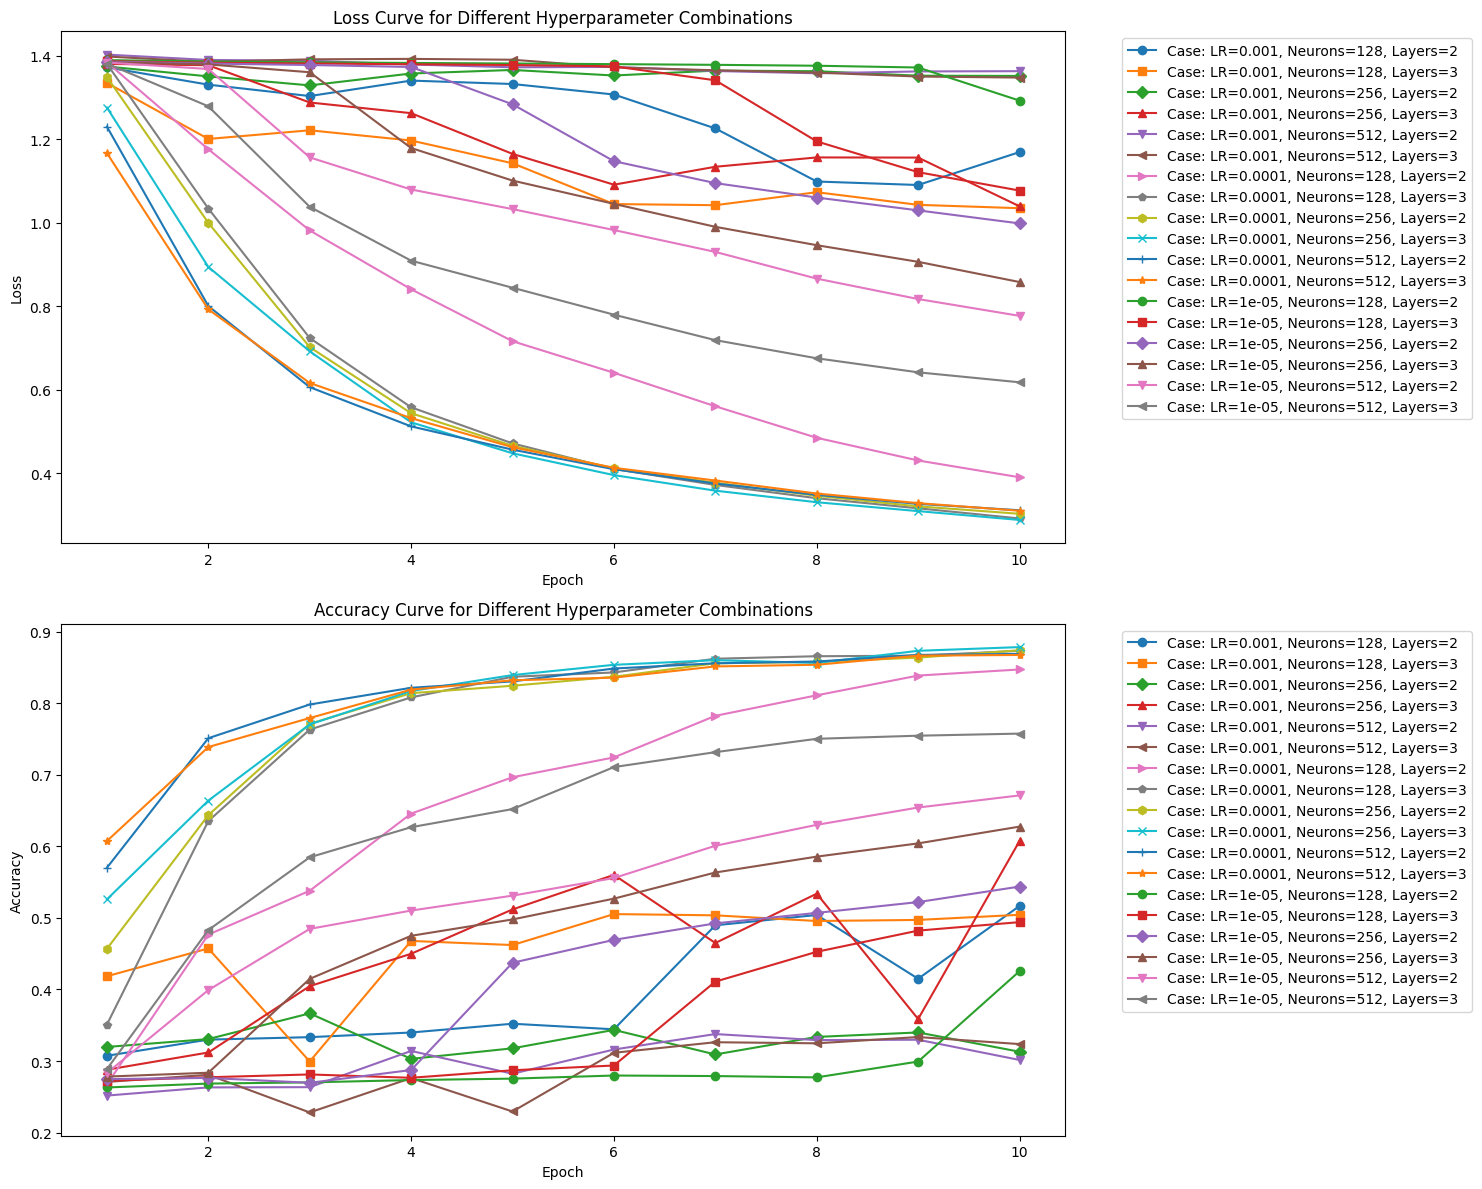

In [ ]:
# Plotting Grid Search Results for Simple RNN Model

print(f"Best Configuration for Simple RNN Model: {best_params_rnn}")

plot_grid_search_results(results_df_rnn)

### Running model training with the best hyperparameters found

Once we have the best hyperparameters, we can run the training function with these hyperparameters to see the results.

In this case, we set the number of epochs to 10, the hyperparameters found in the grid search, and the model architecture. We instantiate the model and set the device to cuda if it is available.

Finally, we defined Adam as the optimizer, with the learning rate found in the grid search and a fixed weight decay of 1e-4, this value for the professor's suggestion.

In [ ]:
# Added seed for reproducibility
torch.manual_seed(42)

epochs = 10
lr = best_params_rnn['learning_rate']
neurons = best_params_rnn['hidden_size']
layers = best_params_rnn['layers']

# instantiate model
rnn_model = Simple_RNN_Model(EMBEDDING_SIZE, neurons, layers, NUM_CLASSES)
rnn_model.to(device)

# The adam optimiser is used, we added the weight decay parameter to regularize the weights, for suggestion of the professor, it is fixed at 1e-4
optimiser = torch.optim.Adam(rnn_model.parameters(), lr=lr, weight_decay=1e-4)


Starting the training process, we can see the progress of the training and the results of the training and validation loss and accuracy.

In [ ]:
# Added seed for reproducibility
torch.manual_seed(42)

print(f"Training Simple RNN Model with LR={lr}, Neurons={neurons}, Layers={layers}")

accuracy_history_rnn, loss_history_rnn = train(rnn_model, optimiser=optimiser,  epochs=epochs)

Training Simple RNN Model with LR=0.0001, Neurons=256, Layers=3


Epoch 1/10: 100%|██████████| 422/422 [00:09<00:00, 46.51it/s]


Epoch [1/10], Loss: 1.3255
Validation Accuracy: 0.45%
Improved validation accuracy to 0.45%


Epoch 2/10: 100%|██████████| 422/422 [00:08<00:00, 46.98it/s]


Epoch [2/10], Loss: 0.9933
Validation Accuracy: 0.67%
Improved validation accuracy to 0.67%


Epoch 3/10: 100%|██████████| 422/422 [00:09<00:00, 46.28it/s]


Epoch [3/10], Loss: 0.7303
Validation Accuracy: 0.75%
Improved validation accuracy to 0.75%


Epoch 4/10: 100%|██████████| 422/422 [00:08<00:00, 47.37it/s]


Epoch [4/10], Loss: 0.5999
Validation Accuracy: 0.78%
Improved validation accuracy to 0.78%


Epoch 5/10: 100%|██████████| 422/422 [00:09<00:00, 46.62it/s]


Epoch [5/10], Loss: 0.5288
Validation Accuracy: 0.81%
Improved validation accuracy to 0.81%


Epoch 6/10: 100%|██████████| 422/422 [00:08<00:00, 47.36it/s]


Epoch [6/10], Loss: 0.4742
Validation Accuracy: 0.82%
Improved validation accuracy to 0.82%


Epoch 7/10: 100%|██████████| 422/422 [00:08<00:00, 47.60it/s]


Epoch [7/10], Loss: 0.4429
Validation Accuracy: 0.82%
No significant improvement. Patience counter: 1/2


Epoch 8/10: 100%|██████████| 422/422 [00:08<00:00, 47.46it/s]


Epoch [8/10], Loss: 0.4194
Validation Accuracy: 0.84%
Improved validation accuracy to 0.84%


Epoch 9/10: 100%|██████████| 422/422 [00:09<00:00, 46.72it/s]


Epoch [9/10], Loss: 0.3940
Validation Accuracy: 0.84%
No significant improvement. Patience counter: 1/2


Epoch 10/10: 100%|██████████| 422/422 [00:08<00:00, 47.05it/s]


Epoch [10/10], Loss: 0.3808
Validation Accuracy: 0.85%
No significant improvement. Patience counter: 2/2
Early stopping due to no significant improvement in validation accuracy.
Training complete.


After the training is finished, we will test its accuracy on the test dataset. This dataset was not used during the training process, so it is a good way to test the model's generalization.

In [ ]:
print(f'Test accuracy for Simple RNN is: {accuracy(rnn_model, test_loader):.4f}')

Test accuracy for Simple RNN is: 0.8528


The result of the test dataset is around 0.85 (~85%), which is an acceptable result for the model, and it is close to the accuracy shown in the validation dataset during the training process. This means that the model does not overfit the training data.

#### Plotting the loss and accuracy behaviors from the training process

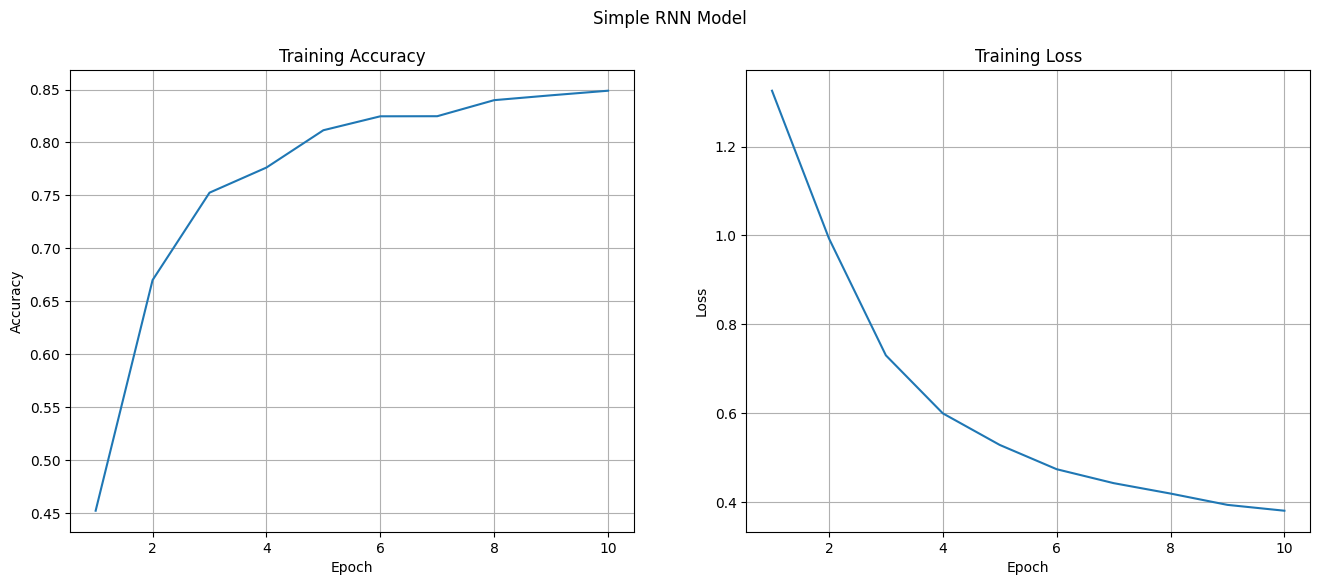

In [ ]:
plot_train_loss_and_accuracy("Simple RNN Model", accuracy_history_rnn, loss_history_rnn)

The training curves for the Simple RNN model show effective learning over the 10 epochs, with accuracy steadily increasing and loss consistently decreasing. The accuracy rises sharply in the first few epochs, reaching around 85% by the end, indicating that the model is successfully capturing patterns in the data. The loss curve mirrors this, with a steep decline initially and then leveling off as training progresses, suggesting that the model is converging. The flattening of both curves towards the end suggests that the Simple RNN has reached a stable performance level on the dataset, but may have limited capacity to further improve with additional epochs.

### Example 2: GRU model

Here, we define the architecture for the GRU model. The GRU model definition is similar to the RNN model, but we are using a GRU layer instead of an RNN layer. The rest of the architecture is the same, especially the initial parameters, where we define the number of classes, the embedding size, the number of neurons in the hidden layer, and the number of layers.

Regardless of the base model architecture, the grid search will help us find the best hyperparameters for the model, specially the number of neurons in the hidden layer and the number of layers, this could be different for the RNN model.

In [ ]:
class GRU_Model(nn.Module):
    def __init__(self, embed_size, hidden, layers, num_classes):
        super().__init__()

        # Embedding layer to convert token indices to embeddings
        self.embedding_layer = nn.Embedding(
            num_embeddings=len(vocab),
            embedding_dim=embed_size
        )

        # GRU layer for improved sequence handling
        self.rnn = nn.GRU(
            input_size=embed_size,
            hidden_size=hidden,
            num_layers=layers,
            batch_first=True,
        )

        # Fully connected layer for classification
        self.fc = nn.Linear(hidden, num_classes)

    def forward(self, x):
        embedded = self.embedding_layer(x)

        # Forward pass through the GRU
        output, _ = self.rnn(embedded)

        # Take the last output from the sequence for classification
        output = output[:, -1, :]

        # Fully connected layer for final output
        return self.fc(output)


#### Looking for the best hyperparameters using Grid Search for the GRU model

We will test the following hyperparameters:

The candidate hyperparameters are:
- learning rates = [1e-3, 1e-4, 1e-5]
- hidden_sizes = [128, 256, 512]
- num_layers = [2, 3]

The candidates were selected based on the same criteria as the RNN model.

In [ ]:
learning_rates = [1e-3, 1e-4, 1e-5]
hidden_sizes = [128, 256, 512]
num_layers_options = [2, 3]

# Example for Simple RNN Model
best_params_gru, best_acc_gru, results_df_gru = grid_search_with_plot(
    model_class=GRU_Model,
    train_loader=train_loader,
    val_loader=val_loader,
    embed_size=EMBEDDING_SIZE,
    num_classes=NUM_CLASSES,
    learning_rates=learning_rates,
    hidden_sizes=hidden_sizes,
    num_layers_options=num_layers_options,
    epochs=10
)

Grid search for GRU_Model started.
Validating Case: LR=0.001, Neurons=128, Layers=2


Epochs: 100%|██████████| 10/10 [01:15<00:00,  7.60s/it]


Validating Case: LR=0.001, Neurons=128, Layers=3


Epochs: 100%|██████████| 10/10 [01:20<00:00,  8.09s/it]


Validating Case: LR=0.001, Neurons=256, Layers=2


Epochs: 100%|██████████| 10/10 [01:26<00:00,  8.60s/it]


Validating Case: LR=0.001, Neurons=256, Layers=3


Epochs: 100%|██████████| 10/10 [01:38<00:00,  9.82s/it]


Validating Case: LR=0.001, Neurons=512, Layers=2


Epochs: 100%|██████████| 10/10 [02:05<00:00, 12.51s/it]


Validating Case: LR=0.001, Neurons=512, Layers=3


Epochs: 100%|██████████| 10/10 [02:38<00:00, 15.89s/it]


Validating Case: LR=0.0001, Neurons=128, Layers=2


Epochs: 100%|██████████| 10/10 [01:15<00:00,  7.53s/it]


Validating Case: LR=0.0001, Neurons=128, Layers=3


Epochs: 100%|██████████| 10/10 [01:21<00:00,  8.15s/it]


Validating Case: LR=0.0001, Neurons=256, Layers=2


Epochs: 100%|██████████| 10/10 [01:26<00:00,  8.63s/it]


Validating Case: LR=0.0001, Neurons=256, Layers=3


Epochs: 100%|██████████| 10/10 [01:37<00:00,  9.77s/it]


Validating Case: LR=0.0001, Neurons=512, Layers=2


Epochs: 100%|██████████| 10/10 [02:03<00:00, 12.37s/it]


Validating Case: LR=0.0001, Neurons=512, Layers=3


Epochs: 100%|██████████| 10/10 [02:37<00:00, 15.71s/it]


Validating Case: LR=1e-05, Neurons=128, Layers=2


Epochs: 100%|██████████| 10/10 [01:13<00:00,  7.35s/it]


Validating Case: LR=1e-05, Neurons=128, Layers=3


Epochs: 100%|██████████| 10/10 [01:20<00:00,  8.05s/it]


Validating Case: LR=1e-05, Neurons=256, Layers=2


Epochs: 100%|██████████| 10/10 [01:25<00:00,  8.50s/it]


Validating Case: LR=1e-05, Neurons=256, Layers=3


Epochs: 100%|██████████| 10/10 [01:36<00:00,  9.69s/it]


Validating Case: LR=1e-05, Neurons=512, Layers=2


Epochs: 100%|██████████| 10/10 [02:03<00:00, 12.36s/it]


Validating Case: LR=1e-05, Neurons=512, Layers=3


Epochs: 100%|██████████| 10/10 [02:38<00:00, 15.82s/it]

Best Configuration: {'learning_rate': 0.001, 'hidden_size': 512, 'layers': 2}
Best Validation Accuracy: 0.9123333333333333


#### Plotting the results of the Grid Search for the GRU model

We will plot the results of the Grid Search for the GRU model to visualize the accuracy of the different hyperparameters combinations.

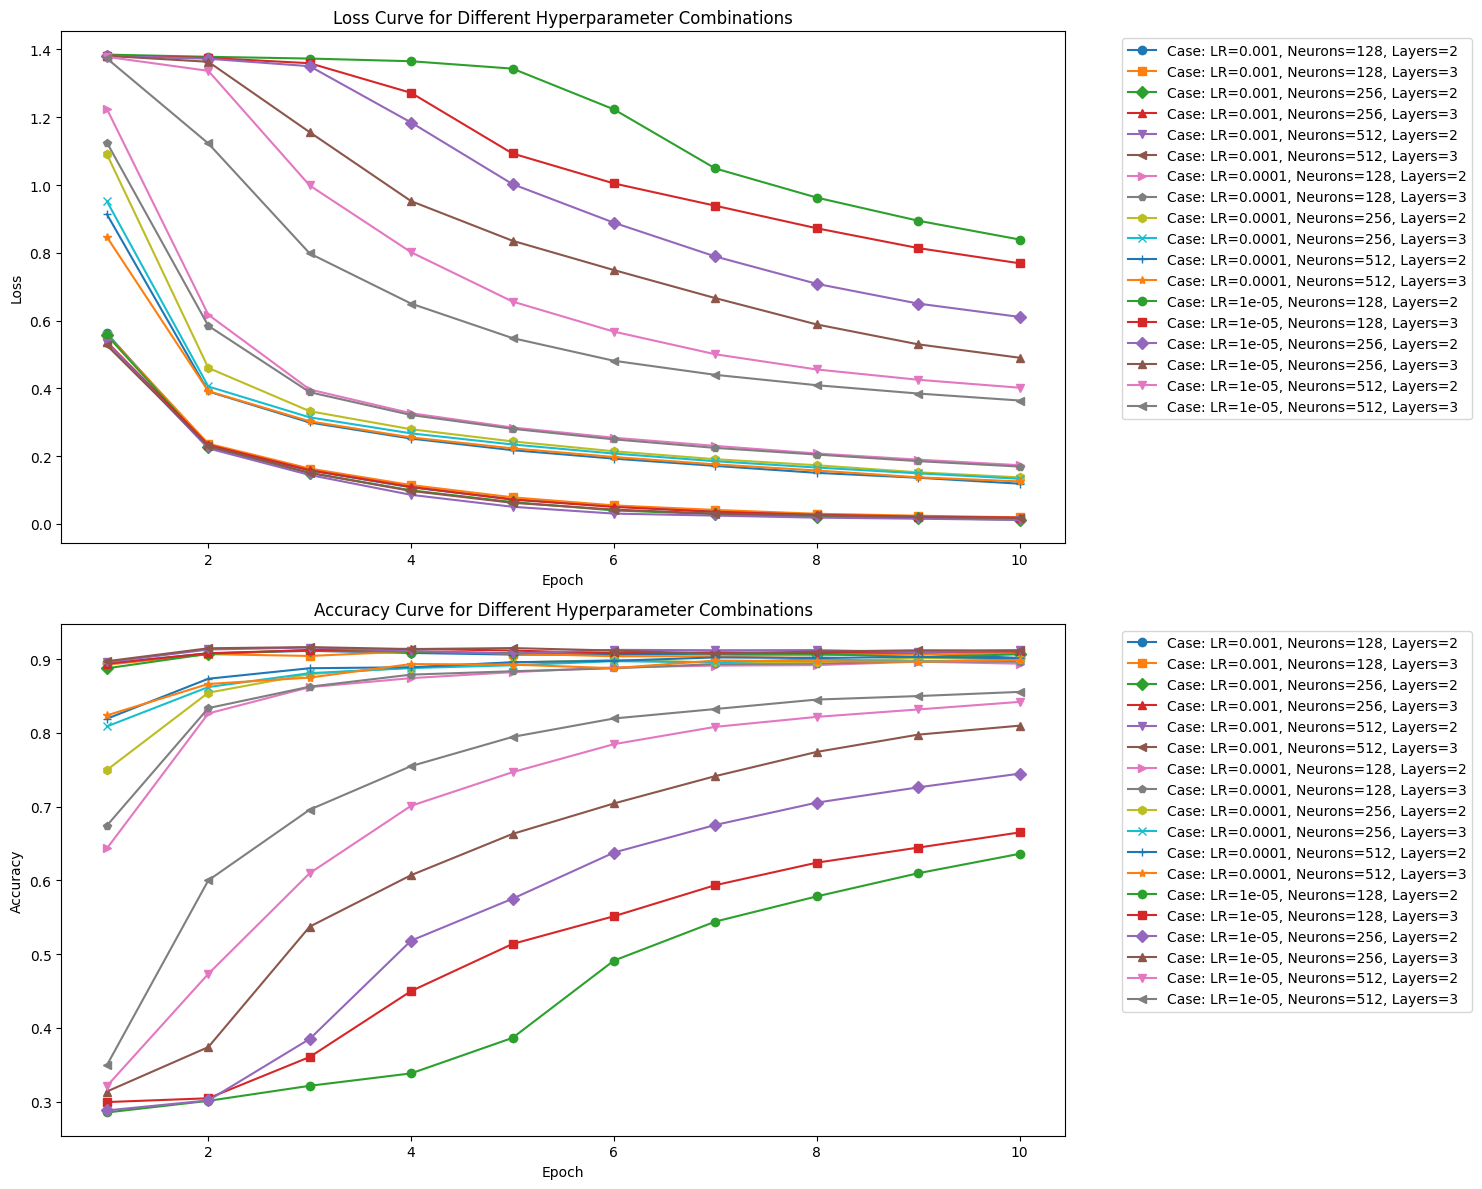

In [ ]:
# Plotting Grid Search Results for GRU Model

plot_grid_search_results(results_df_gru)

#### Running GRU model training with the best hyperparameters found

Once we have the best hyperparameters, we can run the training function with these hyperparameters to see the results.

Similar to the RNN model, we set the number of epochs to 10, the hyperparameters found in the grid search, and the model architecture. We instantiate the model and set the device to CUDA if available.

The Adam optimizer is defined using the same criteria as the RNN model.

In [ ]:
# Added seed for reproducibility
torch.manual_seed(42)

epochs = 10
lr = best_params_gru['learning_rate']
neurons = best_params_gru['hidden_size']
layers = best_params_gru['layers']

# instantiate model
gru_model = GRU_Model(EMBEDDING_SIZE, neurons, layers, NUM_CLASSES)
gru_model.to(device)

# The adam optimiser is used, we added the weight decay parameter to regularize the weights, for suggestion of the professor, it is fixed at 1e-4
optimiser = torch.optim.Adam(gru_model.parameters(), lr=lr, weight_decay=1e-4)

Starting the training process for the GRU model, we can see the progress of the training and the results of the training and validation loss and accuracy.

In [ ]:
# Added seed for reproducibility
torch.manual_seed(42)

print(f"Training GRU model with learning rate={lr}, hidden neurons={neurons}, layers={layers}")

# Training the model with the GRU architecture
accuracy_history_gru, loss_history_gru = train(gru_model, optimiser=optimiser, epochs=epochs)

Training GRU model with learning rate=0.001, hidden neurons=512, layers=2


Epoch 1/10: 100%|██████████| 422/422 [00:12<00:00, 33.98it/s]


Epoch [1/10], Loss: 0.5933
Validation Accuracy: 0.88%
Improved validation accuracy to 0.88%


Epoch 2/10: 100%|██████████| 422/422 [00:12<00:00, 33.78it/s]


Epoch [2/10], Loss: 0.3041
Validation Accuracy: 0.90%
Improved validation accuracy to 0.90%


Epoch 3/10: 100%|██████████| 422/422 [00:12<00:00, 33.82it/s]


Epoch [3/10], Loss: 0.2551
Validation Accuracy: 0.89%
No significant improvement. Patience counter: 1/2


Epoch 4/10: 100%|██████████| 422/422 [00:12<00:00, 33.67it/s]


Epoch [4/10], Loss: 0.2214
Validation Accuracy: 0.91%
Improved validation accuracy to 0.91%


Epoch 5/10: 100%|██████████| 422/422 [00:12<00:00, 33.82it/s]


Epoch [5/10], Loss: 0.1983
Validation Accuracy: 0.91%
No significant improvement. Patience counter: 1/2


Epoch 6/10: 100%|██████████| 422/422 [00:12<00:00, 33.47it/s]


Epoch [6/10], Loss: 0.1774
Validation Accuracy: 0.91%
No significant improvement. Patience counter: 2/2
Early stopping due to no significant improvement in validation accuracy.
Training complete.


Once the training is finished, we will test the model's accuracy on the test dataset. This dataset was not used during training to guarantee the model's generalization.

It's important to note that this training process stops after 6 epochs because the early stopping mechanism was activated, and the model did not improve after 2 epochs.

In [ ]:
# Validation accuracy of the model with the GRU architecture on the test set
print(f'Test accuracy for GRU model is: {accuracy(gru_model, test_loader):.4f}')

Test accuracy for GRU model is: 0.9170


Unlike the RNN model, the GRU model achieved an accuracy of around 0.91 (~91%) on the test dataset. This result is higher than the RNN model's, indicating that the GRU model performs better on this dataset.

It's important to consider that the hyperparameters used in the GRU model are different from those used in the RNN model, so the results are not directly comparable. However, we can see that GRU performs better using the better hyperparameters for each model.

As shown in RNN, the GRU model's accuracy on the test dataset is close to the accuracy shown in the validation dataset during the training process. This means that the model does not overfit the training data.

#### Plotting the loss and accuracy behaviors from the training process for the GRU model results

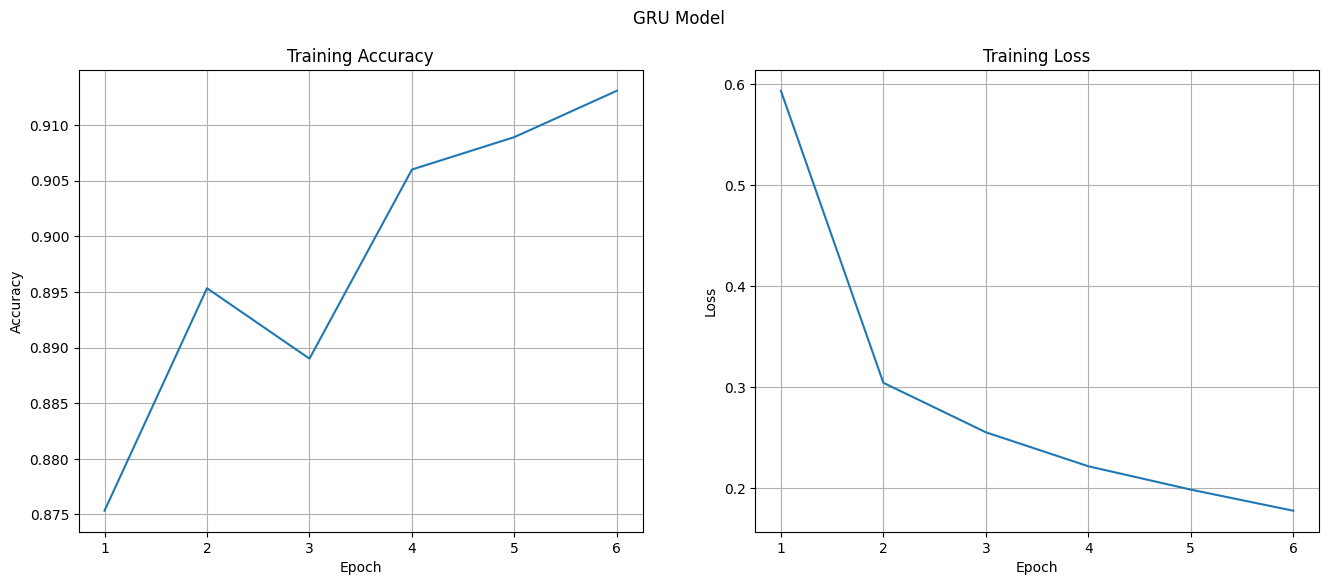

In [ ]:
plot_train_loss_and_accuracy("GRU Model", accuracy_history_gru, loss_history_gru)

The training curves for the GRU model indicate effective and efficient learning, reaching high accuracy and low loss in fewer epochs than the Simple RNN model. In the accuracy plot on the left, we see a steady increase, with minor fluctuations, achieving over 91% accuracy by the 6th epoch. This rapid convergence suggests that the GRU's architecture effectively captures the data patterns, allowing it to reach a high-performance level with fewer epochs.

In the loss plot on the right, we observe a sharp decline in the first few epochs, followed by a gradual tapering as the loss approaches a minimal value. This pattern reflects that the model quickly minimizes and stabilizes errors in the early stages. The early stopping condition halts training once further improvement slows down, showing that the GRU model efficiently reaches an optimal balance, reducing the need for excessive training epochs.

### Example 3: LSTM model

In [ ]:
class LSTM_Model(nn.Module):
    def __init__(self, embed_size, hidden, layers, num_classes):
        super().__init__()

        # Embedding layer to convert token indices to embeddings
        self.embedding_layer = nn.Embedding(
            num_embeddings=len(vocab),
            embedding_dim=embed_size
        )

        # LSTM layer for improved sequence handling
        self.rnn = nn.LSTM(
            input_size=embed_size,
            hidden_size=hidden,
            num_layers=layers,
            batch_first=True
        )

        # Fully connected layer for classification
        self.fc = nn.Linear(hidden, num_classes)

    def forward(self, x):
        embedded = self.embedding_layer(x)

        # Forward pass through the LSTM
        output, (hidden, cell) = self.rnn(embedded)

        # Take the last hidden state from the sequence for classification
        output = hidden[-1]

        # Fully connected layer for final output
        return self.fc(output)


#### Looking for the best hyperparameters using Grid Search for the LSTM model

We will test the LSTM model using a combination of hyperparameters that we found in the Grid Search.

The candidate hyperparameters are:
- learning rates = [1e-3, 1e-4, 1e-5]
- hidden_sizes = [128, 256, 512]
- num_layers = [2, 3]

We are selecting the same hyperparameters as the RNN and GRU models to compare the results and have consistency in the evaluation.

In [ ]:
learning_rates = [1e-3, 1e-4, 1e-5]
hidden_sizes = [128, 256, 512]
num_layers_options = [2, 3]

# Example for Simple RNN Model
best_params_lstm, best_acc_lstm, results_df_lstm = grid_search_with_plot(
    model_class=LSTM_Model,
    train_loader=train_loader,
    val_loader=val_loader,
    embed_size=EMBEDDING_SIZE,
    num_classes=NUM_CLASSES,
    learning_rates=learning_rates,
    hidden_sizes=hidden_sizes,
    num_layers_options=num_layers_options,
    epochs=10
)

Grid search for LSTM_Model started.
Validating Case: LR=0.001, Neurons=128, Layers=2


Epochs: 100%|██████████| 10/10 [01:22<00:00,  8.22s/it]


Validating Case: LR=0.001, Neurons=128, Layers=3


Epochs: 100%|██████████| 10/10 [01:31<00:00,  9.19s/it]


Validating Case: LR=0.001, Neurons=256, Layers=2


Epochs: 100%|██████████| 10/10 [01:28<00:00,  8.87s/it]


Validating Case: LR=0.001, Neurons=256, Layers=3


Epochs: 100%|██████████| 10/10 [01:40<00:00, 10.10s/it]


Validating Case: LR=0.001, Neurons=512, Layers=2


Epochs: 100%|██████████| 10/10 [02:15<00:00, 13.59s/it]


Validating Case: LR=0.001, Neurons=512, Layers=3


Epochs: 100%|██████████| 10/10 [02:56<00:00, 17.67s/it]


Validating Case: LR=0.0001, Neurons=128, Layers=2


Epochs: 100%|██████████| 10/10 [01:20<00:00,  8.08s/it]


Validating Case: LR=0.0001, Neurons=128, Layers=3


Epochs: 100%|██████████| 10/10 [01:30<00:00,  9.09s/it]


Validating Case: LR=0.0001, Neurons=256, Layers=2


Epochs: 100%|██████████| 10/10 [01:27<00:00,  8.80s/it]


Validating Case: LR=0.0001, Neurons=256, Layers=3


Epochs: 100%|██████████| 10/10 [01:40<00:00, 10.08s/it]


Validating Case: LR=0.0001, Neurons=512, Layers=2


Epochs: 100%|██████████| 10/10 [02:15<00:00, 13.57s/it]


Validating Case: LR=0.0001, Neurons=512, Layers=3


Epochs: 100%|██████████| 10/10 [02:56<00:00, 17.67s/it]


Validating Case: LR=1e-05, Neurons=128, Layers=2


Epochs: 100%|██████████| 10/10 [01:20<00:00,  8.07s/it]


Validating Case: LR=1e-05, Neurons=128, Layers=3


Epochs: 100%|██████████| 10/10 [01:30<00:00,  9.09s/it]


Validating Case: LR=1e-05, Neurons=256, Layers=2


Epochs: 100%|██████████| 10/10 [01:27<00:00,  8.78s/it]


Validating Case: LR=1e-05, Neurons=256, Layers=3


Epochs: 100%|██████████| 10/10 [01:40<00:00, 10.07s/it]


Validating Case: LR=1e-05, Neurons=512, Layers=2


Epochs: 100%|██████████| 10/10 [02:16<00:00, 13.65s/it]


Validating Case: LR=1e-05, Neurons=512, Layers=3


Epochs: 100%|██████████| 10/10 [02:57<00:00, 17.73s/it]

Best Configuration: {'learning_rate': 0.001, 'hidden_size': 512, 'layers': 3}
Best Validation Accuracy: 0.9109166666666667


#### Plotting the results of the Grid Search for the LSTM model

We will plot the results of the Grid Search for the LSTM model to visualize the accuracy of the different hyperparameters combinations.

Best LSTM Configuration: {'learning_rate': 0.001, 'hidden_size': 512, 'layers': 3}


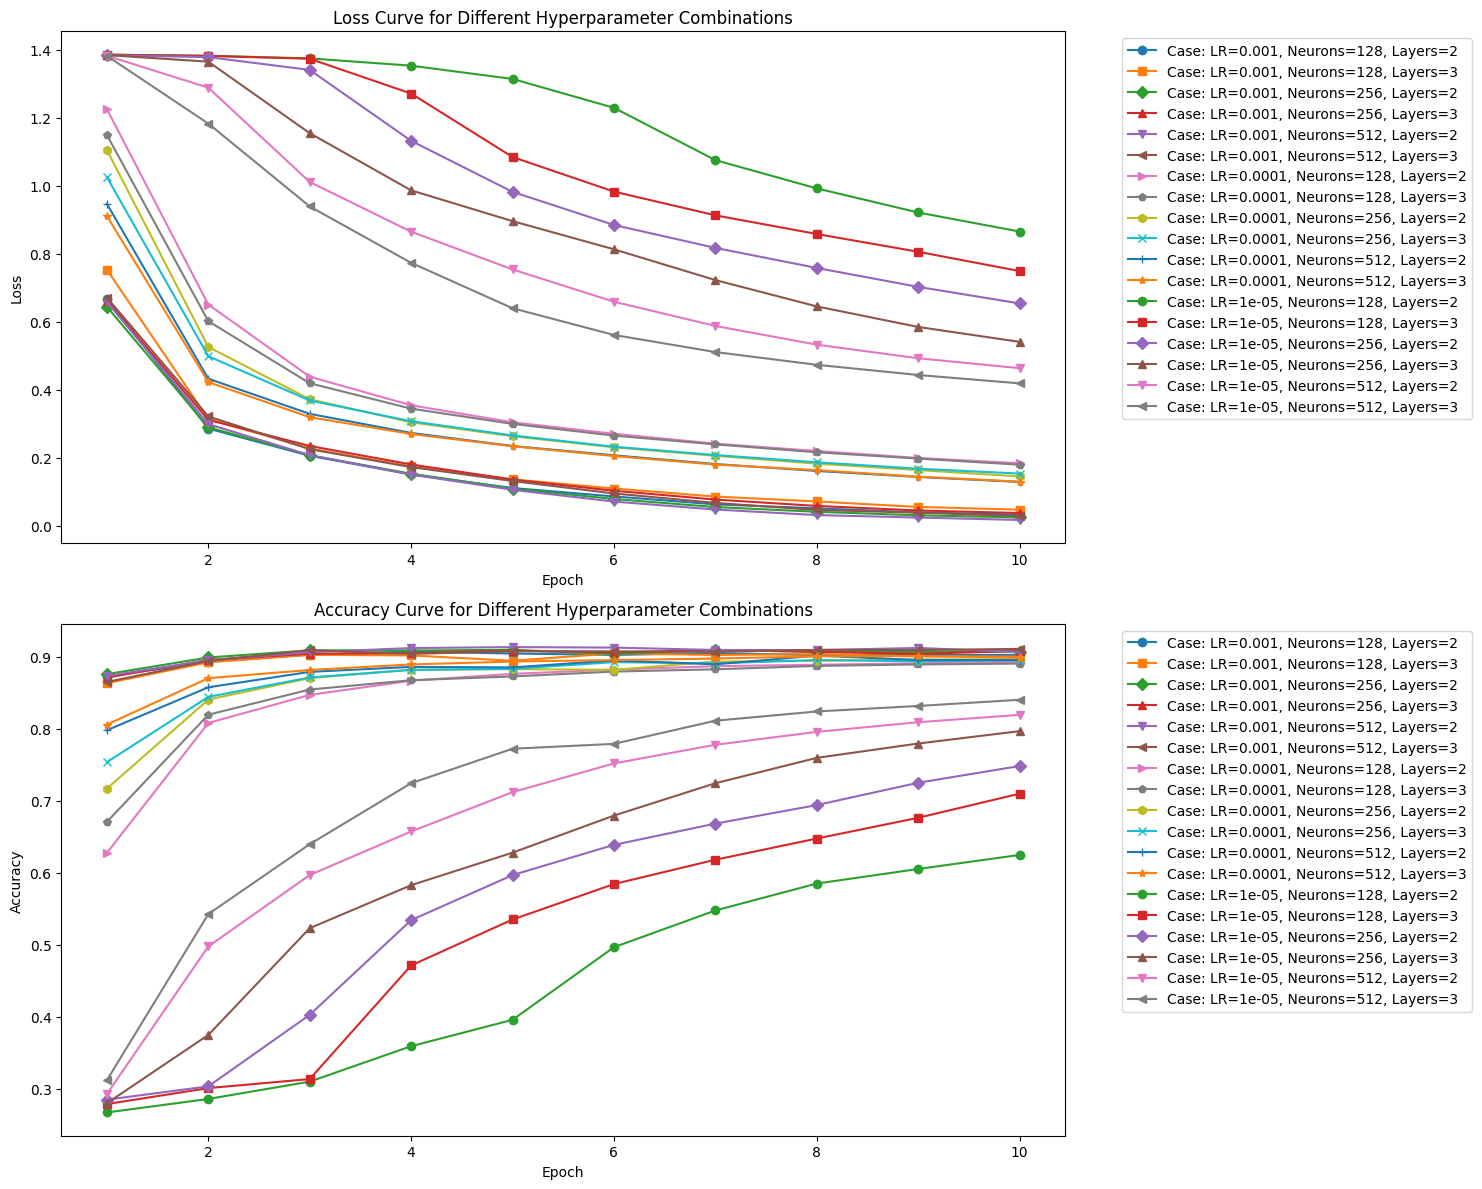

In [ ]:
print(f"Best LSTM Configuration: {best_params_lstm}")

plot_grid_search_results(results_df_lstm)

We can observe many almost transposed lines, this is because the accuracy is very similar for different combinations of hyperparameters. This is a good sign because it means that the model is stable and the hyperparameters do not significantly affect the model performance. But we need to find the best hyperparameters to ensure the best performance. So we will use the best results from the grid search.

#### Running LSTM model training with the best hyperparameters found

Similar to the RNN and GRU models, we set the number of epochs to 10, the hyperparameters found in the grid search, and the model architecture. We instantiate the model and set the device to CUDA if available.

The Adam optimizer is defined using the same criteria as the RNN and GRU models.

In [ ]:
# Added seed for reproducibility
torch.manual_seed(42)

epochs = 10
lr = best_params_lstm['learning_rate']
neurons = best_params_lstm['hidden_size']
layers = best_params_lstm['layers']

# instantiate model
lstm_model = LSTM_Model(EMBEDDING_SIZE, neurons, layers, NUM_CLASSES)
lstm_model.to(device)

# The adam optimiser is used, we added the weight decay parameter to regularize the weights, for suggestion of the professor, it is fixed at 1e-4
optimiser = torch.optim.Adam(lstm_model.parameters(), lr=lr, weight_decay=1e-4)


Once the model training setup is complete, we start the training process for the LSTM model. We can see the progress of the training and the results of the training and validation loss and accuracy.

In [ ]:
# Added seed for reproducibility
torch.manual_seed(42)

print(f"Training LSTM model with learning rate={lr}, hidden neurons={neurons}, layers={layers}")

# Training the model with the LSTM architecture
accuracy_history_lstm, loss_history_lstm = train(lstm_model, optimiser=optimiser,  epochs=epochs)

Training LSTM model with learning rate=0.001, hidden neurons=512, layers=3


Epoch 1/10: 100%|██████████| 422/422 [00:17<00:00, 23.90it/s]


Epoch [1/10], Loss: 0.7623
Validation Accuracy: 0.84%
Improved validation accuracy to 0.84%


Epoch 2/10: 100%|██████████| 422/422 [00:17<00:00, 23.73it/s]


Epoch [2/10], Loss: 0.4047
Validation Accuracy: 0.86%
Improved validation accuracy to 0.86%


Epoch 3/10: 100%|██████████| 422/422 [00:17<00:00, 23.67it/s]


Epoch [3/10], Loss: 0.3170
Validation Accuracy: 0.88%
Improved validation accuracy to 0.88%


Epoch 4/10: 100%|██████████| 422/422 [00:17<00:00, 23.75it/s]


Epoch [4/10], Loss: 0.2749
Validation Accuracy: 0.90%
Improved validation accuracy to 0.90%


Epoch 5/10: 100%|██████████| 422/422 [00:17<00:00, 23.75it/s]


Epoch [5/10], Loss: 0.2413
Validation Accuracy: 0.91%
No significant improvement. Patience counter: 1/2


Epoch 6/10: 100%|██████████| 422/422 [00:17<00:00, 23.78it/s]


Epoch [6/10], Loss: 0.2142
Validation Accuracy: 0.91%
Improved validation accuracy to 0.91%


Epoch 7/10: 100%|██████████| 422/422 [00:17<00:00, 23.65it/s]


Epoch [7/10], Loss: 0.1968
Validation Accuracy: 0.91%
No significant improvement. Patience counter: 1/2


Epoch 8/10: 100%|██████████| 422/422 [00:17<00:00, 23.86it/s]


Epoch [8/10], Loss: 0.1812
Validation Accuracy: 0.91%
No significant improvement. Patience counter: 2/2
Early stopping due to no significant improvement in validation accuracy.
Training complete.


We will test the model's accuracy on the test dataset, which was not used during training to ensure the model's generalization.

We can also observe that the training process stops after 8 epochs because the early stopping mechanism was activated, and the model did not improve after 2 epochs.

In [ ]:
# Validation accuracy of the model with the LSTM architecture on the test set
print(f'Test accuracy for LSTM model is: {accuracy(lstm_model, test_loader):.4f}')

Test accuracy for LSTM model is: 0.9074


The result of the test dataset is around 0.90 (~90%), which is an acceptable result for the model, and it is close to the accuracy shown in the validation dataset during the training process. But, different from the GRU model, the LSTM model did not achieve a higher accuracy on the test dataset, and its performance is less than the GRU model. This could be due to the dataset characteristics and the model's capacity to capture the patterns in the data. The closest results between LSTM and GRU models may indicate that the dataset does not require the additional complexity of the LSTM model.

#### Plotting the loss and accuracy behaviors from the training process for the GRU model results

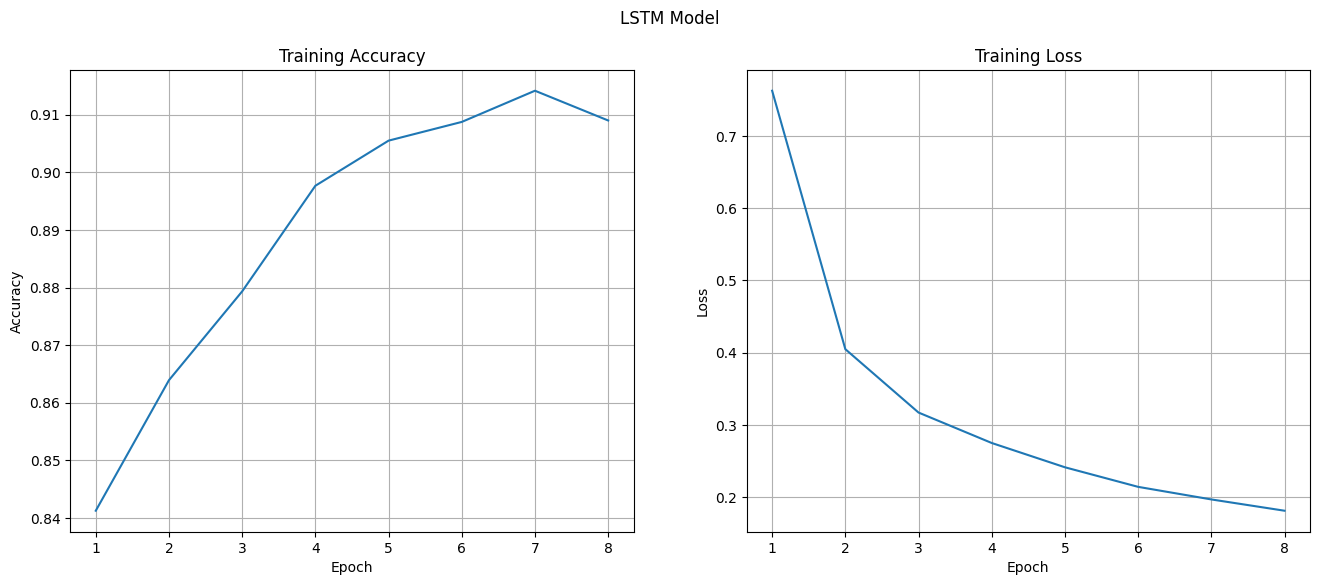

In [ ]:
plot_train_loss_and_accuracy("LSTM Model", accuracy_history_lstm, loss_history_lstm)

The training results for the LSTM model show a smooth and steady improvement in both accuracy and loss over the training epochs. The accuracy graph on the left demonstrates a consistent upward trend, reaching around 91% accuracy by the 7th epoch, after which there is a slight drop. This peak and subsequent drop suggest that the model might be approaching its optimal performance but may also be experiencing slight overfitting. The loss curve on the right shows a sharp decrease initially, followed by a gradual downward trend, indicating that the model is effectively minimizing errors during training.

When compared to the GRU model, the LSTM requires slightly more epochs to reach a similar performance level, which is consistent with LSTMs typically being more complex and potentially slower to converge. Both models achieve comparable final accuracy, but the GRU reaches this level in fewer epochs due to its simpler, yet effective, architecture. This suggests that while both LSTM and GRU models can perform well on the task, the GRU may be more efficient for this specific dataset, achieving similar accuracy with less training time.

### Performance comparison between the RNN, GRU, and LSTM models using sample text

The `sample_text` function evaluates multiple models by generating sample predictions and comparing them with true labels for a batch of text data. It takes a list of models, their corresponding names, a data loader, and a vocabulary object to interpret tokenized data.

After setting each model to evaluation mode, it iterates over a batch of inputs from the loader and collects predictions for each model. For a subset of examples in the batch (controlled by `num_samples`), it reconstructs the original text, retrieves the true label, and compares predictions from each model against this true label. The function then displays each text sample along with the true label, each model’s prediction, and an indication of whether the prediction was correct. This process provides an informative comparison across different models, allowing for a quick assessment of each model's performance on specific samples.

In [ ]:
def sample_text(models, model_names, loader, vocab, num_samples=5):
    assert len(models) == len(model_names), "Each model must have a corresponding name."

    # Set models to evaluation mode
    for model in models:
        model.eval()

    examples = []

    # Collect predictions and true labels
    with torch.no_grad():
        for inputs, labels in loader:
            # Move data to the correct device
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Get the batch size for random sampling
            batch_size = inputs.shape[0]

            # Get predictions for each model
            model_predictions = []
            for model in models:
                outputs = model(inputs)
                predicted_classes = torch.argmax(outputs, dim=1)
                model_predictions.append(predicted_classes.cpu().numpy())

            # Convert true labels to a list
            labels = labels.cpu().numpy()

            # Randomly sample indices from the batch
            sample_indices = random.sample(range(batch_size), min(num_samples, batch_size))

            # Gather the original texts, predicted classes, and true labels
            for idx in sample_indices:
                original_text = " ".join([vocab.lookup_token(i) for i in inputs[idx].cpu().numpy() if i != vocab["<pad>"]])
                true_label = labels[idx]
                predictions = [model_pred[idx] for model_pred in model_predictions]

                examples.append((original_text, predictions, true_label))

            # Stop once we have collected enough examples
            if len(examples) >= num_samples:
                break

    # Display the examples
    print("Sample Predictions from All Models:")
    for i, (text, preds, true) in enumerate(examples):
        print(f"\nExample {i+1}:")
        print(f"Original Text: {text}")
        print(f"True Label: {true}")
        for model_name, pred in zip(model_names, preds):
            result = "✅ Correct" if pred == true else "❌ Incorrect"
            print(f"{model_name} Prediction: {pred} - {result}")
        print("-" * 50)

Running the function to show results.

In [ ]:
# Usage
models = [lstm_model, gru_model, rnn_model]
model_names = ["LSTM Model", "GRU Model", "Simple RNN Model"]
sample_text(models, model_names, test_loader, vocab)

Sample Predictions from All Models:

Example 1:
Original Text: the servers cannot take the strain , captain ! a san francisco startup plans to boldly go where no game developer has gone before with an online game based on the cult tv series quot star trek .
True Label: 3
LSTM Model Prediction: 3 - ✅ Correct
GRU Model Prediction: 3 - ✅ Correct
Simple RNN Model Prediction: 1 - ❌ Incorrect
--------------------------------------------------

Example 2:
Original Text: sec may finalize qwest settlement today the securities and exchange commission is expected to announce today a settlement with qwest that is highly critical of quot senior management , quot two sources familiar with the case said .
True Label: 2
LSTM Model Prediction: 2 - ✅ Correct
GRU Model Prediction: 2 - ✅ Correct
Simple RNN Model Prediction: 2 - ✅ Correct
--------------------------------------------------

Example 3:
Original Text: steel stocks soar as shortages are biting steel shares hit seven-year highs yesterday after 

The results above show sample predictions from three different models (LSTM, GRU, and Simple RNN) on text classification tasks. For each example, the function displays the original text, the true label, and the prediction from each model, indicating whether the prediction was correct. In these samples, both the LSTM and GRU models consistently achieve correct predictions, while the Simple RNN model occasionally misclassifies certain examples, such as in Example 1 and Example 4. This suggests that the LSTM and GRU models, with their advanced architectures for capturing sequential dependencies, are better suited for accurately classifying complex text data compared to the Simple RNN. Overall, this comparison provides a quick qualitative assessment of each model's performance and highlights the superior accuracy of LSTM and GRU in this task.

### Analysing the confusion matrix for the 3 models

The `display_confusion_matrices` function generates and displays the confusion matrices for multiple models on a text classification task. For each model, it first sets the model to evaluation mode and iterates through the data loader to collect predictions and true labels. Using these, it computes the confusion matrix, which provides a visual summary of correct and incorrect predictions across all classes, helping to identify patterns of misclassification.

After displaying each confusion matrix, the function identifies and describes the most common mistakes for each model. Specifically, it examines the off-diagonal values in the matrix to find which true labels are most frequently misclassified as other labels. This analysis helps to pinpoint specific areas where each model might be struggling, providing insights into potential improvements for model accuracy.

In [ ]:
# create confusion matrix
def display_confusion_matrices(models, model_names, loader):
    assert len(models) == len(model_names), "Each model must have a corresponding name."

    for model, name in zip(models, model_names):
        model.eval()  # Set model to evaluation mode
        all_preds = []
        all_labels = []

        # Collect predictions and true labels
        with torch.no_grad():
            for inputs, labels in loader:
                # Move data to the correct device
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        # Compute confusion matrix
        cm = confusion_matrix(all_labels, all_preds)

        # Plot the confusion matrix
        plt.figure(figsize=(10, 8))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues, values_format='d')
        plt.title(f"Confusion Matrix for {name}")
        plt.show()

        # Calculate common mistakes
        most_common_mistakes = {}
        for true_label in range(cm.shape[0]):
            # Exclude the diagonal (correct predictions)
            predicted_errors = cm[true_label, :] - np.eye(cm.shape[0])[true_label] * cm[true_label, true_label]
            common_error_idx = np.argmax(predicted_errors)
            most_common_mistakes[true_label] = common_error_idx

        # Print a description of the most common mistakes
        print(f"Most common mistakes for {name}:")
        for true_class, mistaken_class in most_common_mistakes.items():
            print(f" - True class {true_class} is often mistaken as class {mistaken_class}")
        print("-" * 50)



<Figure size 1000x800 with 0 Axes>

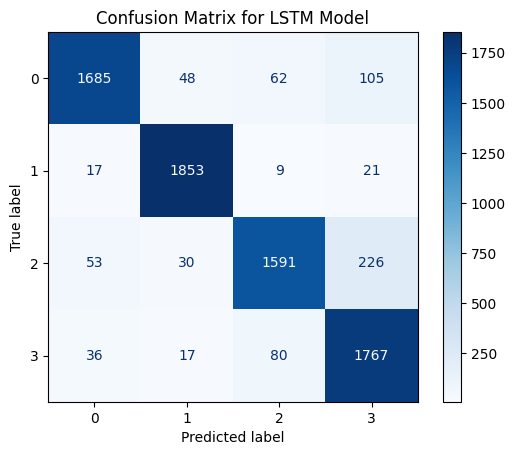

Most common mistakes for LSTM Model:
 - True class 0 is often mistaken as class 3
 - True class 1 is often mistaken as class 3
 - True class 2 is often mistaken as class 3
 - True class 3 is often mistaken as class 2
--------------------------------------------------


<Figure size 1000x800 with 0 Axes>

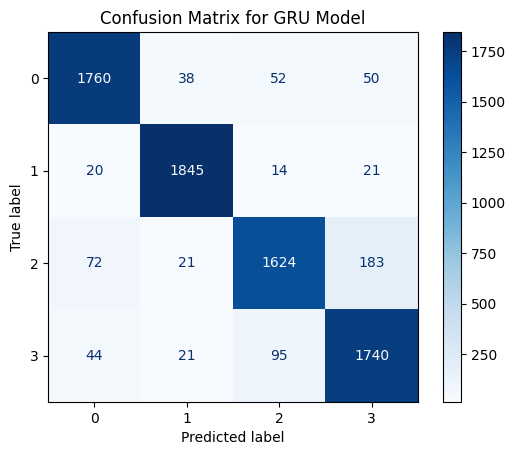

Most common mistakes for GRU Model:
 - True class 0 is often mistaken as class 2
 - True class 1 is often mistaken as class 3
 - True class 2 is often mistaken as class 3
 - True class 3 is often mistaken as class 2
--------------------------------------------------


<Figure size 1000x800 with 0 Axes>

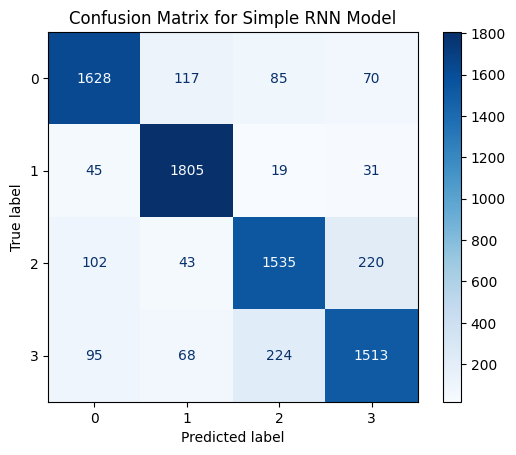

Most common mistakes for Simple RNN Model:
 - True class 0 is often mistaken as class 1
 - True class 1 is often mistaken as class 0
 - True class 2 is often mistaken as class 3
 - True class 3 is often mistaken as class 2
--------------------------------------------------


In [ ]:
# Usage
models = [lstm_model, gru_model, rnn_model]
model_names = ["LSTM Model", "GRU Model", "Simple RNN Model"]
display_confusion_matrices(models, model_names, test_loader)

The confusion matrices for the LSTM, GRU, and Simple RNN models provide a detailed view of each model’s classification performance and areas of misclassification. Each matrix displays the number of correct predictions along the diagonal, while off-diagonal values represent misclassified instances.

For the LSTM model, the most common misclassification occurs when classes 0, 1, and 2 are mistaken for class 3, and class 3 is occasionally mistaken for class 2.

The GRU model shows similar patterns, with class 2 frequently mistaken as class 3 and vice versa.

For the Simple RNN model, the confusion matrix indicates a broader range of misclassifications, with class 0 often misidentified as class 1, class 1 as class 0, and class 3 as class 2.

The summary of common mistakes confirms these patterns. The LSTM and GRU models primarily struggle with distinguishing between classes 2 and 3, which might indicate similarities in the data structure of these classes. The Simple RNN model, however, shows more diverse misclassification errors across various classes, reflecting its lower ability to capture complex patterns compared to the LSTM and GRU. This analysis highlights the effectiveness of LSTM and GRU models in accurately classifying most examples while identifying specific areas for improvement, particularly in differentiating between similar classes.

## General conclusions

In this exercise, our team explored text classification using various recurrent neural network architectures, specifically Simple RNN, GRU, and LSTM models. The primary goal of the project was to assess the effectiveness of each model in classifying text data into predefined categories, analyzing their training processes, evaluating their performance, and identifying patterns in misclassification. Through detailed training curves, confusion matrices, and sample predictions, we observed the strengths and limitations of each model, gaining a practical understanding of how different architectures handle sequential data.

One key takeaway was the advantage of using advanced architectures like GRU and LSTM over Simple RNN for text classification tasks. Both GRU and LSTM models achieved higher accuracy and converged faster, reflecting their capacity to capture long-term dependencies and mitigate issues like vanishing gradients. The confusion matrices further highlighted these models' effectiveness, with fewer misclassifications compared to the Simple RNN. Additionally, by analyzing common misclassifications, we learned about areas where each model struggled, offering insights into the types of errors typical for sequential data and text classification.

Overall, this project provided valuable hands-on experience with recurrent neural networks, reinforcing our understanding of their application in text processing tasks. We gained practical insights into model selection, performance evaluation, and error analysis, all essential skills for applying machine learning techniques to real-world problems involving sequential data.